In [2]:
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

In [3]:
# Вхідний файл, який містить дані
input_file = "income_data.txt"
# Читання даних
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, "r") as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if "?" in line:
            continue

        data = line[:-1].split(", ")

        if data[-1] == "<=50K" and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == ">50K" and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [4]:
X = np.array(X)
# Перетворення рядкових даних на числові
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)


LR: 
F1 score: 75.66%
Accuracy: 78.85%
Recall: 78.85%
Precision: 77.03%

LDA: 
F1 score: 79.35%
Accuracy: 81.14%
Recall: 81.14%
Precision: 79.86%

KNN: 
F1 score: 74.16%
Accuracy: 76.67%
Recall: 76.67%
Precision: 73.99%

CART: 
F1 score: 80.69%
Accuracy: 80.62%
Recall: 80.71%
Precision: 80.91%

NB: 
F1 score: 75.89%
Accuracy: 78.87%
Recall: 78.87%
Precision: 76.97%

SVM: 
F1 score: 64.52%
Accuracy: 75.1%
Recall: 75.1%
Precision: 68.18%



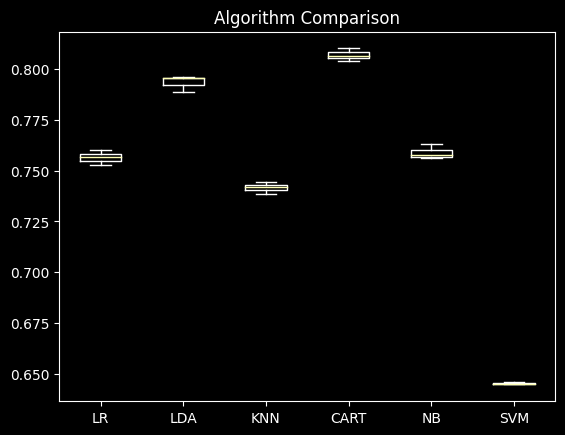

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Завантажуємо алгоритми моделі
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


# оцінюємо модель на кожній ітерації
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    print('%s: ' % name)
    f1 = cross_val_score(model, X, y, scoring='f1_weighted', cv=3)
    print("F1 score: " + str(round(100 * f1.mean(), 2)) + "%")
    accuracy_values = cross_val_score(model, X, y, scoring='accuracy', cv=3)
    print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
    recall_values = cross_val_score(model, X, y, scoring='recall_weighted', cv=3)
    print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")
    precision_values = cross_val_score(model, X, y, scoring='precision_weighted', 
    cv=3)
    print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
    results.append(f1)
    names.append(name)
    print()
# Порівняння алгоритмів
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()